In [2]:
import cv2
import numpy as np
import pandas as pd
import time
import os
import glob
from horizon.flir_boson_settings import I, D, P

import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
import rasterio.merge
import rasterio.mask
import pyproj
from PIL import ImageColor
import shapely
from shapely import Polygon
import skimage 

from utils.utils import thermal2rgb
from utils.projections import (
    project_points, 
    power_spacing, 
    world2cam, 
    create_world_grid,
    world_to_camera_coords,
)

from utils.draw import (
    draw_overlay_and_labels, 
    points_to_segmentation, 
    generate_binary_mask,
    colorize_dynamic_world_label,
    HEX_COLORS,
    dynamic_world_color_map,
)

import open3d as o3d

In [3]:
pts = np.load('outputs/thermal-10000.npy')
img = cv2.imread('outputs/thermal-10000.png', 1)

In [4]:
bunny = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny.path)
mesh.compute_vertex_normals()

pcd = mesh.sample_points_poisson_disk(750)

In [5]:
pcl = o3d.geometry.PointCloud()
pcl.points = o3d.utility.Vector3dVector(pts[:,:3])

In [ ]:
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)
vis.add_geometry(pcl)
img = vis.capture_screen_float_buffer(do_render=True)
vis.destroy_window()

: 

: 

: 

: 

In [ ]:
plt.imshow(img)

In [42]:
o3d.visualization.draw_geometries([pcl])

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [12]:
pt_xy = pts.T.reshape(4, 500, 300)

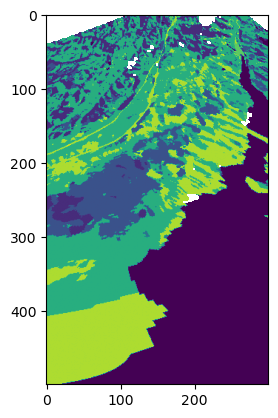

In [13]:
plt.imshow(pt_xy[-1,::-1,:])

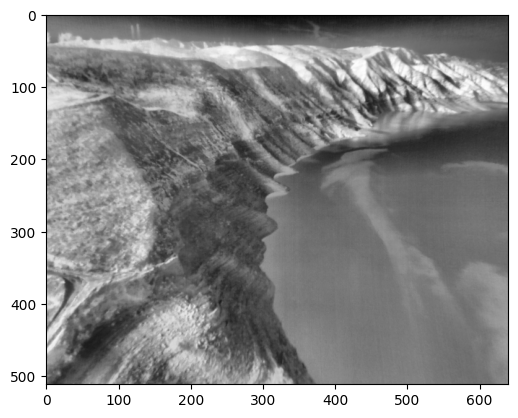

In [8]:
plt.imshow(img)